### Overview

The **UNSW-NB15 Dataset** is a comprehensive network intrusion dataset designed for cybersecurity research and benchmarking. It contains network traffic records categorized as either normal or malicious, with detailed features that enable tasks such as anomaly detection, intrusion detection, and traffic analysis. This project focuses on loading, inspecting, and preparing the dataset for further analysis, leveraging its rich features to explore machine learning techniques for cybersecurity applications.


In [1]:
import os
import numpy as np
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# List all files in the /root directory, including hidden ones
!ls -a /root

.   .bashrc  .config   .jupyter  .launchpadlib	.npm	  .tmux.conf
..  .cache   .ipython  .keras	 .local		.profile  .wget-hsts


In [3]:
# Define the path where the dataset should be located
dataset_path = '/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15'

# Check if the dataset is already downloaded
if not os.path.exists(dataset_path):
    # If not, download the dataset
    path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")
    print("Dataset downloaded.")
else:
    # If the dataset is already downloaded, skip the download
    print(f"Dataset already exists at: {dataset_path}")

print("Path to dataset files:", dataset_path)

100%|██████████| 149M/149M [00:01<00:00, 119MB/s]

Extracting files...


Dataset downloaded.
Path to dataset files: /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15


### Loading the UNSW-NB15 Dataset

#### **Objective**
Load and inspect the **UNSW-NB15** dataset,  which is a comprehensive network intrusion dataset used for cybersecurity research. This dataset contains multiple CSV files with event lists, features, and records of network activity, categorized as normal or malicious.

---

#### **Steps to Load Data**
1. **Load Individual CSV Files**:
   - **`list_events_df`**:
     - Contains a list of events in the dataset.
   - **`features_df`**:
     - Describes the features available in the dataset.
   - **`one_df`, `two_df`, `three_df`, `four_df`**:
     - Segments of the main dataset split into four separate CSV files for manageability.
2. **Read Files**:
   - Uses `pandas.read_csv` to load each file into a DataFrame for easy manipulation and exploration.
   - Applies the appropriate encoding for files with non-UTF-8 characters (e.g., `ISO-8859-1`).

---

#### **Dataset Inspection**
- **Feature Exploration**:
  - **`features_df.head()`**: Displays the first few rows of the feature description file to understand the dataset's structure.
- **Data Overview**:
  - Displays the first few rows of each segmented dataset (`one_df`, `two_df`, `three_df`, `four_df`) for verification.
- **Data Types**:
  - Prints the type of `list_events_df` to confirm successful loading as a Pandas DataFrame.
  - **`list_events_df.head()`**: Provides a quick preview of the event list.


In [4]:
# Load the dataset
list_events_df = pd.read_csv(f'{dataset_path}/versions/1/UNSW-NB15_LIST_EVENTS.csv')
features_df = pd.read_csv(f'{dataset_path}/versions/1/NUSW-NB15_features.csv', encoding='ISO-8859-1')
one_df = pd.read_csv(f'{dataset_path}/versions/1/UNSW-NB15_1.csv')
two_df = pd.read_csv(f'{dataset_path}/versions/1/UNSW-NB15_2.csv')
three_df = pd.read_csv(f'{dataset_path}/versions/1/UNSW-NB15_3.csv')
four_df = pd.read_csv(f'{dataset_path}/versions/1/UNSW-NB15_4.csv')

print(features_df.head())
print()
print(one_df.head())
print()
print(two_df.head())
print()
print(three_df.head())
print()
print(four_df.head())

# Verify data types and print the first few rows
print(type(list_events_df))
print(list_events_df.head())

<ipython-input-4-390dfdef8efb>:4: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  one_df = pd.read_csv(f'{dataset_path}/versions/1/UNSW-NB15_1.csv')
<ipython-input-4-390dfdef8efb>:5: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  two_df = pd.read_csv(f'{dataset_path}/versions/1/UNSW-NB15_2.csv')


   No.    Name    Type               Description
0    1   srcip  nominal        Source IP address
1    2   sport  integer       Source port number
2    3   dstip  nominal   Destination IP address
3    4  dsport  integer  Destination port number
4    5   proto  nominal     Transaction protocol

   59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31  \
0  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
1  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   
2  59.166.0.5   3593  149.171.126.5    53  udp  CON  0.001209  132  164  31   
3  59.166.0.3  49664  149.171.126.0    53  udp  CON  0.001169  146  178  31   
4  59.166.0.0  32119  149.171.126.9   111  udp  CON  0.078339  568  312  31   

   ...  0.17   3  7  1  3.1  1.1  1.2  1.3  Unnamed: 47  0.18  
0  ...     0   2  4  2    3    1    1    2          NaN     0  
1  ...     0  12  8  1    2    2    1    1          NaN     0  
2  ...     0   6  9  1    1    1    1 

### Dataset Inspection and Cleaning

#### **1. Inspecting the Feature Dataset**
- **Purpose**:
  - Display the structure and content of the **features dataset** to understand the available features and their descriptions.
- **Output**:
  - Prints the first few rows of `features_df` for initial exploration.

---

#### **2. Inspecting the First Partition of Data**
- **Purpose**:
  - Preview the first few rows of `one_df`, the first partition of the UNSW-NB15 dataset, to understand its structure and sample values.
- **Output**:
  - Prints the first few rows of `one_df`.

---

#### **3. Dropping Unnecessary Columns**
- **`Unnamed: 47`**:
  - This column is dropped from all four partitions (`one_df`, `two_df`, `three_df`, `four_df`) as it appears to be irrelevant.
  - The `errors='ignore'` option ensures no errors are raised if the column is missing.

---

#### **4. Converting Data Types**
- **Purpose**:
  - Ensures all columns have consistent and appropriate data types for analysis and modeling.
- **Method**:
  - Applies `convert_dtypes()` to each partition, converting columns to their most suitable data types (e.g., integer, float, or string).

---

#### **5. Handling Missing Values**
- **Missing Value Check**:
  - Identifies any columns with missing values in the first partition (`one_df_clean`).
- **Output**:
  - Displays the number of missing values per column in `one_df_clean`.

---

#### **6. Dataset Shapes**
- **Purpose**:
  - Provides the number of rows and columns in each cleaned partition.
- **Output**:
  - Displays the shape of `one_df_clean`, `two_df_clean`, `three_df_clean`, and `four_df_clean`.

---

#### **7. Data Type Verification**
- **Purpose**:
  - Verifies the data types of columns after cleaning to ensure compatibility for downstream analysis.
- **Output**:
  - Prints the data types of `one_df_clean`.




In [5]:
# Inspect the feature dataset
print("Features dataset:")
print(features_df.head())
print()

# Inspect the first dataframe
print("First partition of data:")
print(one_df.head())
print()

# Drop Unnamed columns
one_df_clean = one_df.drop(columns=['Unnamed: 47'], errors='ignore')
two_df_clean = two_df.drop(columns=['Unnamed: 47'], errors='ignore')
three_df_clean = three_df.drop(columns=['Unnamed: 47'], errors='ignore')
four_df_clean = four_df.drop(columns=['Unnamed: 47'], errors='ignore')

# Check for mixed data types and handle them
# Converting to proper data types if needed
one_df_clean = one_df_clean.convert_dtypes()
two_df_clean = two_df_clean.convert_dtypes()
three_df_clean = three_df_clean.convert_dtypes()
four_df_clean = four_df_clean.convert_dtypes()

# Check for missing values
print("Missing values in dataset 1:")
print(one_df_clean.isnull().sum())
print()

# Print the shape to understand the number of rows and columns
print(f"Dataset 1 shape: {one_df_clean.shape}")
print(f"Dataset 2 shape: {two_df_clean.shape}")
print(f"Dataset 3 shape: {three_df_clean.shape}")
print(f"Dataset 4 shape: {four_df_clean.shape}")

# Checking data types after conversion
print("Data types after cleaning:")
print(one_df_clean.dtypes)

Features dataset:
   No.    Name    Type               Description
0    1   srcip  nominal        Source IP address
1    2   sport  integer       Source port number
2    3   dstip  nominal   Destination IP address
3    4  dsport  integer  Destination port number
4    5   proto  nominal     Transaction protocol

First partition of data:
   59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31  \
0  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
1  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   
2  59.166.0.5   3593  149.171.126.5    53  udp  CON  0.001209  132  164  31   
3  59.166.0.3  49664  149.171.126.0    53  udp  CON  0.001169  146  178  31   
4  59.166.0.0  32119  149.171.126.9   111  udp  CON  0.078339  568  312  31   

   ...  0.17   3  7  1  3.1  1.1  1.2  1.3  Unnamed: 47  0.18  
0  ...     0   2  4  2    3    1    1    2          NaN     0  
1  ...     0  12  8  1    2    2    1    1          NaN    

### Cleaning and Inspecting Attack Categories and Subcategories

#### **1. Unique Values Before Cleaning**
- **Purpose**:
  - Identifies the unique values in the **`Attack category`** column before any cleaning is applied.
- **Output**:
  - Displays the initial unique attack categories, which may include inconsistencies such as leading/trailing spaces or case variations.

---

#### **2. Cleaning `Attack category` Data**
- **Steps**:
  - **Remove Spaces**:
    - Strips leading and trailing spaces from the values in the **`Attack category`** column.
  - **Normalize Case**:
    - Converts all values to lowercase to ensure consistency.
- **Output**:
  - Displays the unique attack categories after cleaning.
  - Prints the total number of unique attack categories, ensuring the dataset is normalized for analysis.

---

#### **3. Cleaning `Attack subcategory` Data**
- **Steps**:
  - **Remove Spaces**:
    - Strips leading and trailing spaces from the values in the **`Attack subcategory`** column.
  - **Normalize Case**:
    - Converts all values to lowercase to ensure consistency.
- **Output**:
  - Displays the total number of unique attack subcategories after cleaning.

---

#### **4. Handling Missing Values**
- **Steps**:
  - Removes rows where either **`Attack category`** or **`Attack subcategory`** is missing.
- **Purpose**:
  - Ensures the dataset is complete and ready for further analysis, focusing only on rows with valid attack information.


In [6]:
# Get unique 'Attack category' values before cleaning
unique_attack_category = list_events_df['Attack category'].unique()
print(f"Unique attack categories before cleaning: {unique_attack_category}")

# Clean data for 'Attack category'
list_events_df['Attack category'] = list_events_df['Attack category'].str.strip()  # Remove leading/trailing spaces
list_events_df['Attack category'] = list_events_df['Attack category'].str.lower()  # Convert to lowercase

# Get unique 'Attack category' values after cleaning
unique_attack_category = list_events_df['Attack category'].unique()
print(f"Unique attack categories after cleaning: {unique_attack_category}")
print(f"Number of unique attack categories: {len(unique_attack_category)}")

# Clean data for 'Attack subcategory'
list_events_df['Attack subcategory'] = list_events_df['Attack subcategory'].str.strip()  # Remove leading/trailing spaces
list_events_df['Attack subcategory'] = list_events_df['Attack subcategory'].str.lower()  # Convert to lowercase

# Get unique 'Attack subcategory' values after cleaning
unique_attack_subcategory = list_events_df['Attack subcategory'].unique()
print(f"Number of unique attack subcategories: {len(unique_attack_subcategory)}")

# Drop rows where either 'Attack category' or 'Attack subcategory' is missing
list_events_df.dropna(subset=['Attack category', 'Attack subcategory'], inplace=True)

Unique attack categories before cleaning: ['normal' ' Fuzzers ' ' Fuzzers' ' Reconnaissance ' ' Shellcode '
 'Analysis' 'Backdoors' 'DoS' 'Exploits' 'Generic' 'Reconnaissance'
 'Shellcode' 'Worms' nan]
Unique attack categories after cleaning: ['normal' 'fuzzers' 'reconnaissance' 'shellcode' 'analysis' 'backdoors'
 'dos' 'exploits' 'generic' 'worms' nan]
Number of unique attack categories: 11
Number of unique attack subcategories: 105


### Cleaning and Saving Processed Data

#### **Global Setup**
- **Define Path for Cleaned Data**:
  - **`cleaned_data_path`**: Specifies the directory where cleaned versions of the dataset will be stored.
- **Directory Check**:
  - Creates the directory if it does not already exist, ensuring a structured location for saving cleaned files.

---

#### **Cleaning and Saving Files**
1. **Partition 1: `UNSW-NB15_1_cleaned.csv`**
   - **Process**:
     - Drops unnecessary columns (e.g., `Unnamed: 47`).
     - Converts data types for consistency using `convert_dtypes()`.
   - **Saving**:
     - Saves the cleaned data to the specified path if it does not already exist.

2. **Partition 2: `UNSW-NB15_2_cleaned.csv`**
   - **Process**:
     - Performs the same cleaning steps as Partition 1.
   - **Saving**:
     - Checks for the existence of the cleaned file before saving to avoid redundant processing.

3. **Partition 3: `UNSW-NB15_3_cleaned.csv`**
   - **Process**:
     - Cleans the dataset similarly to the other partitions.
   - **Saving**:
     - Ensures the cleaned file is saved only if it does not already exist.

4. **Partition 4: `UNSW-NB15_4_cleaned.csv`**
   - **Process**:
     - Repeats the cleaning steps to prepare the fourth partition for analysis.
   - **Saving**:
     - Saves the cleaned file, ensuring no duplicates are created.

---

#### **Key Features**
- **Automated Cleaning**:
  - Automates the cleaning process for each dataset partition, reducing manual effort.
- **Incremental Processing**:
  - Checks if cleaned files already exist, skipping processing for previously cleaned datasets.
- **Consistent Structure**:
  - Ensures all cleaned files follow the same structure and format.



In [7]:
##########
# GLOBAL #
##########

# Define the path for cleaned data
cleaned_data_path = '/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/'

# Check if the cleaned data directory exists, if not create it
if not os.path.exists(cleaned_data_path):
    os.makedirs(cleaned_data_path)
    print(f"Created directory: {cleaned_data_path}")


##########
# FOR  1 #
##########
# Check if cleaned files exist, if not process and save them
cleaned_one_path = os.path.join(cleaned_data_path, 'UNSW-NB15_1_cleaned.csv')
if not os.path.exists(cleaned_one_path):
    # Clean the data
    one_df_clean = one_df.drop(columns=['Unnamed: 47'], errors='ignore').convert_dtypes()

    # Save cleaned file
    one_df_clean.to_csv(cleaned_one_path, index=False)
    print(f"Cleaned data saved to {cleaned_one_path}")
else:
    print(f"Cleaned file already exists: {cleaned_one_path}")


##########
# FOR  2 #
##########


# Repeat the same process for the second CSV
cleaned_two_path = os.path.join(cleaned_data_path, 'UNSW-NB15_2_cleaned.csv')
if not os.path.exists(cleaned_two_path):
    # Clean the data
    two_df_clean = two_df.drop(columns=['Unnamed: 47'], errors='ignore').convert_dtypes()

    # Save cleaned file
    two_df_clean.to_csv(cleaned_two_path, index=False)
    print(f"Cleaned data saved to {cleaned_two_path}")
else:
    print(f"Cleaned file already exists: {cleaned_two_path}")


##########
# FOR  3 #
##########
cleaned_three_path = os.path.join(cleaned_data_path, 'UNSW-NB15_3_cleaned.csv')
if not os.path.exists(cleaned_three_path):
    # Clean the data
    three_df_clean = three_df.drop(columns=['Unnamed: 47'], errors='ignore').convert_dtypes()

    # Save cleaned file
    three_df_clean.to_csv(cleaned_three_path, index=False)
    print(f"Cleaned data saved to {cleaned_three_path}")
else:
    print(f"Cleaned file already exists: {cleaned_three_path}")


##########
# FOR  4 #
##########

cleaned_four_path = os.path.join(cleaned_data_path, 'UNSW-NB15_4_cleaned.csv')
if not os.path.exists(cleaned_four_path):
    # Clean the data
    four_df_clean = four_df.drop(columns=['Unnamed: 47'], errors='ignore').convert_dtypes()

    # Save cleaned file
    four_df_clean.to_csv(cleaned_four_path, index=False)
    print(f"Cleaned data saved to {cleaned_four_path}")
else:
    print(f"Cleaned file already exists: {cleaned_four_path}")


Created directory: /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/
Cleaned data saved to /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/UNSW-NB15_1_cleaned.csv
Cleaned data saved to /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/UNSW-NB15_2_cleaned.csv
Cleaned data saved to /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/UNSW-NB15_3_cleaned.csv
Cleaned data saved to /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/UNSW-NB15_4_cleaned.csv


### Statistical Analysis and Visualizations

#### **1. Summary Statistics**
- **`list_events_df.describe()`**:
  - Provides a statistical summary of numerical columns in the dataset, such as:
    - Count, mean, standard deviation, minimum, and maximum values.
  - Useful for understanding the distribution and range of numerical features, such as the **`Number of events`**.

---

#### **2. Aggregation by Categories and Subcategories**
- **Attack Categories**:
  - Groups the data by **`Attack category`** and calculates the total **`Number of events`** for each category.
  - Sorts the results in descending order to identify the most frequent attack categories.
- **Attack Subcategories**:
  - Similarly groups the data by **`Attack subcategory`** and sums the **`Number of events`** for each subcategory.
  - Results are sorted to highlight the most common subcategories.

---

#### **3. Visualizations**
- **Distribution of Attack Categories**:
  - **Bar Plot**:
    - Visualizes the total number of events for each attack category.
    - Highlights the prevalence of different categories in the dataset.
  - **Purpose**:
    - Provides a clear comparison of how frequently each attack category occurs.
- **Distribution of Attack Subcategories**:
  - **Bar Plot**:
    - Displays the total number of events for each attack subcategory.
    - Useful for detailed analysis of specific attack types within categories.
  - **Purpose**:
    - Helps identify the most common subcategories contributing to each attack category.


       Number of events
count        206.000000
mean        1559.626214
std        14452.000930
min            1.000000
25%            7.000000
50%           36.500000
75%          431.250000
max       207243.000000
Total events by Attack category:
  Attack category  Number of events
5         generic            215481
3        exploits             44525
4         fuzzers             24246
2             dos             16353
6  reconnaissance             13987
0        analysis              2677
1       backdoors              2329
7       shellcode              1511
8           worms               174

Total events by Attack subcategory:
   Attack subcategory  Number of events
41               ixia            214638
7             browser              8986
48      miscellaneous              8706
75                smb              7375
6                 bgp              6163
..                ...               ...
52            netbios                 6
12       cisco skinny             

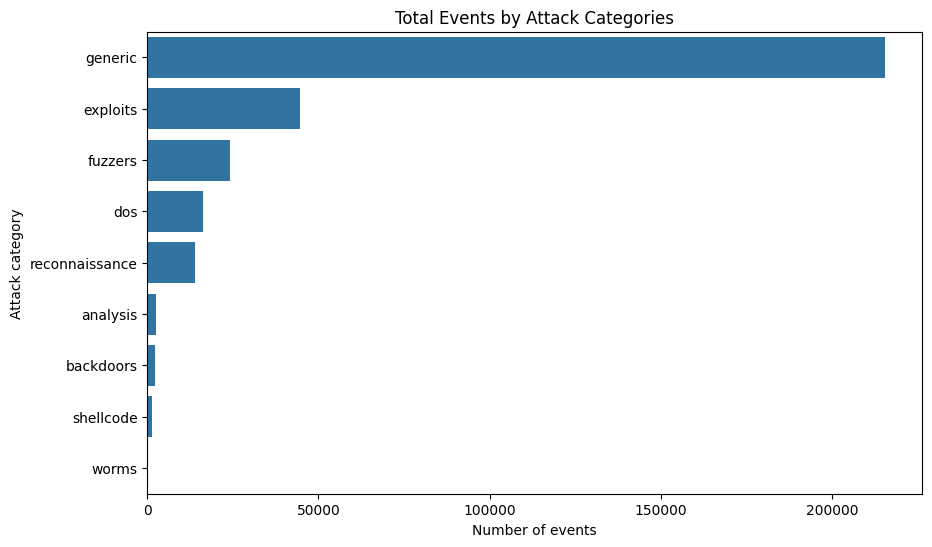

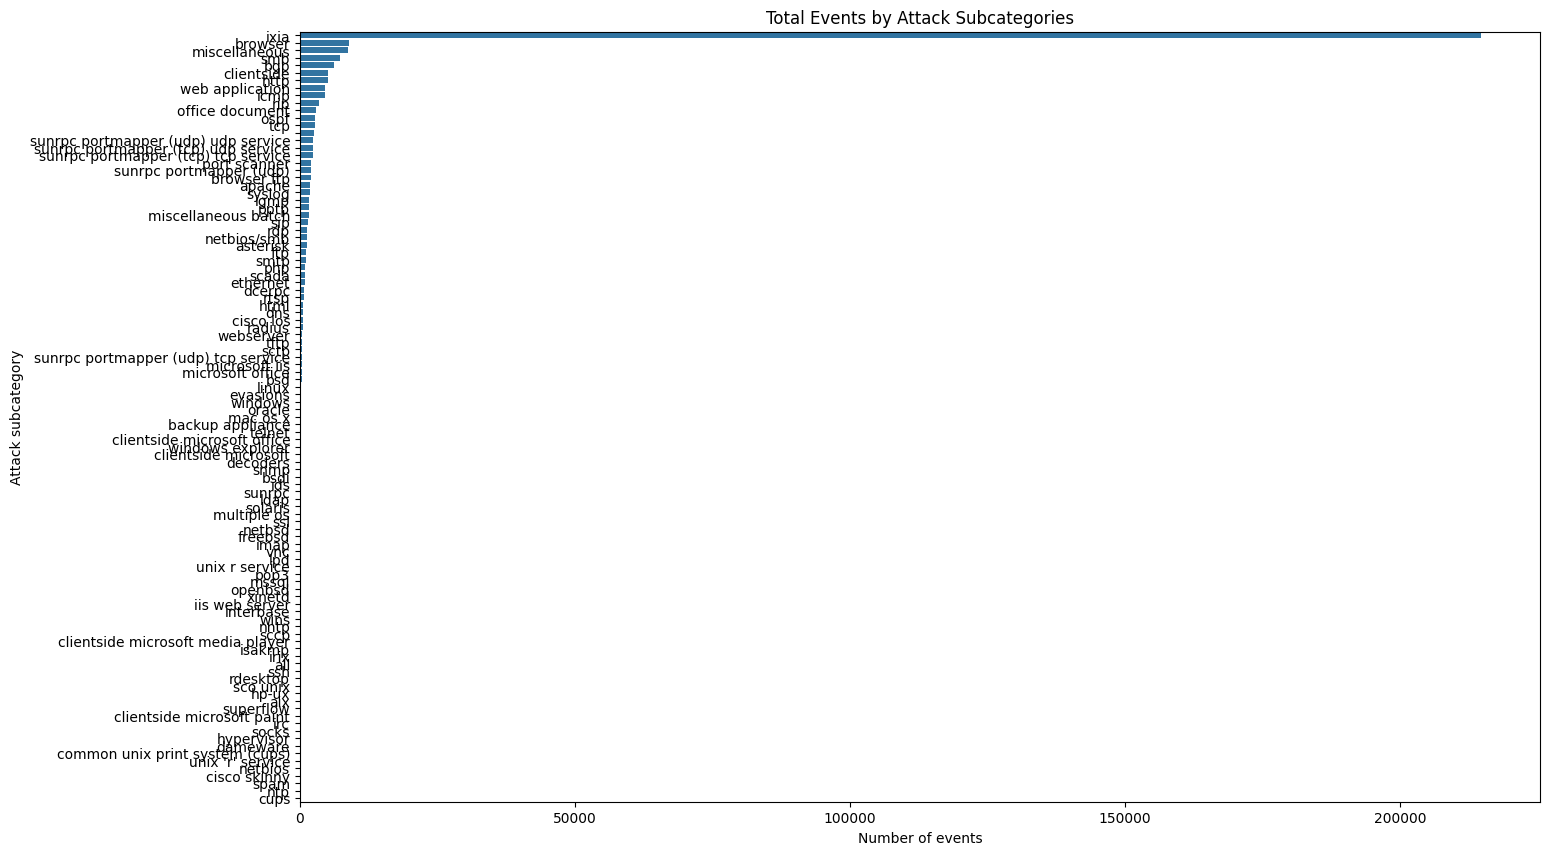

In [8]:
# Show summary statistics
print(list_events_df.describe())  # Summary statistics

# Group by 'Attack category' and sum 'Number of events'
attack_category_event_sum = list_events_df.groupby('Attack category')['Number of events'].sum().reset_index()
attack_category_event_sum = attack_category_event_sum.sort_values(by='Number of events', ascending=False)

# Group by 'Attack subcategory' and sum 'Number of events'
attack_subcategory_event_sum = list_events_df.groupby('Attack subcategory')['Number of events'].sum().reset_index()
attack_subcategory_event_sum = attack_subcategory_event_sum.sort_values(by='Number of events', ascending=False)

# Print the results
print("Total events by Attack category:")
print(attack_category_event_sum)

print("\nTotal events by Attack subcategory:")
print(attack_subcategory_event_sum)

# Plot Distribution of Attack Categories based on the sum of 'Number of events'
plt.figure(figsize=(10, 6))
sns.barplot(data=attack_category_event_sum, y='Attack category', x='Number of events', order=attack_category_event_sum['Attack category'])
plt.title('Total Events by Attack Categories')
plt.show()

# Plot Distribution of Attack Subcategories based on the sum of 'Number of events'
plt.figure(figsize=(16, 10))
sns.barplot(data=attack_subcategory_event_sum, y='Attack subcategory', x='Number of events', order=attack_subcategory_event_sum['Attack subcategory'])
plt.title('Total Events by Attack Subcategories')
plt.show()


### Visualization: Attack Subcategories with Logarithmic Scale

#### **Description**
- **Bar Plot**:
  - Visualizes the total number of events for each **`Attack subcategory`**, using a logarithmic scale for the x-axis.
- **Purpose**:
  - Highlights the distribution of events across subcategories, especially when there is a large disparity in event counts.
  - The logarithmic scale ensures that smaller counts are visible while maintaining the proportional representation of larger counts.



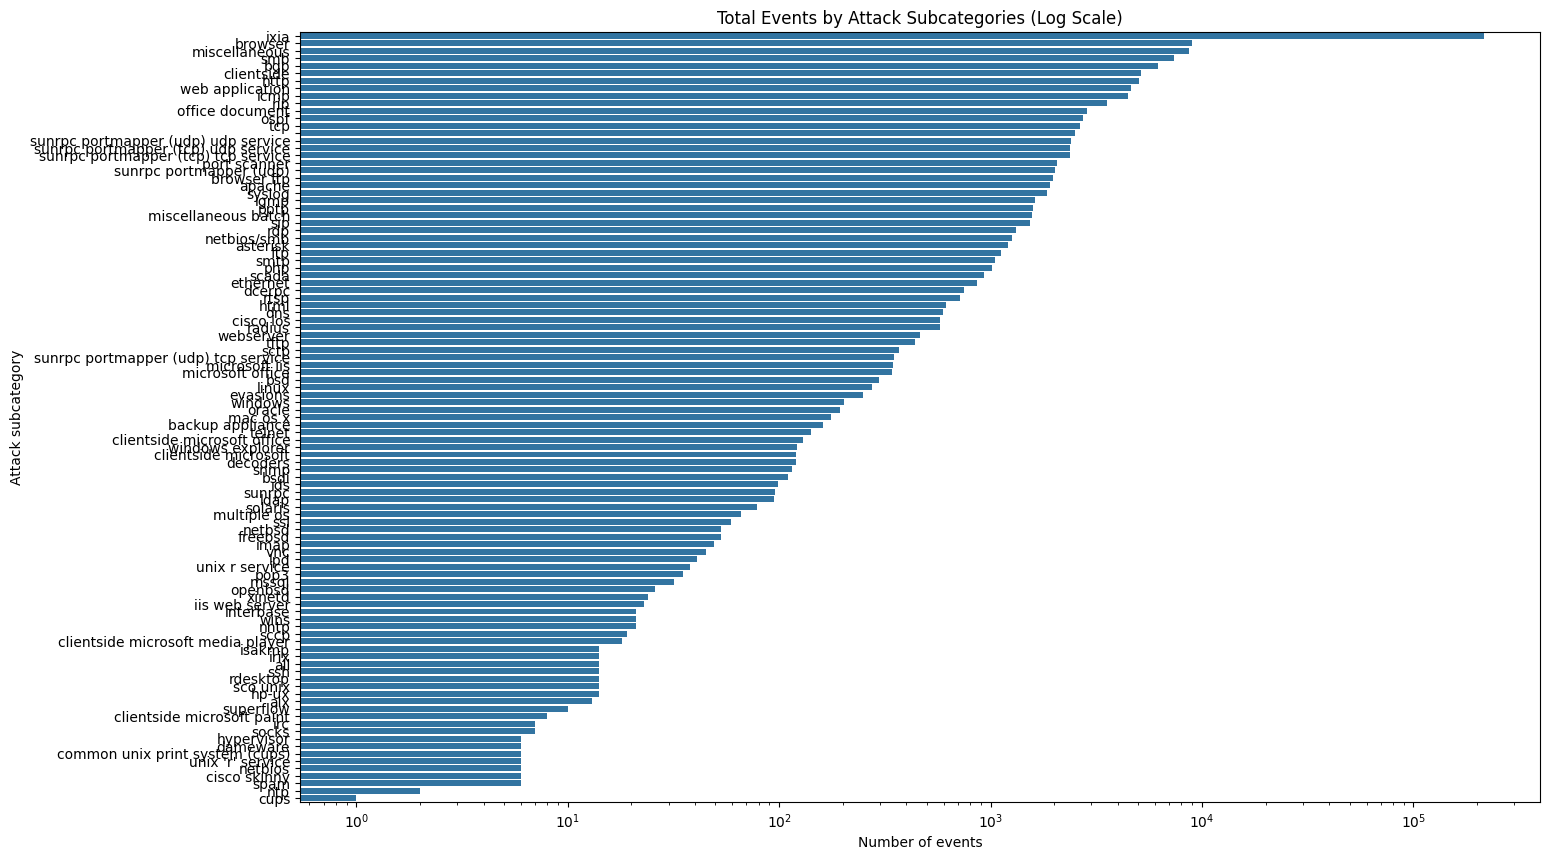

In [9]:
plt.figure(figsize=(16, 10))
sns.barplot(data=attack_subcategory_event_sum, y='Attack subcategory', x='Number of events', order=attack_subcategory_event_sum['Attack subcategory'])
plt.xscale('log')  # Apply log scale to x-axis
plt.title('Total Events by Attack Subcategories (Log Scale)')
plt.show()

### Visualization: Top Attack Subcategories by Total Events

#### **Description**
- **Bar Plot**:
  - Displays the top **N** attack subcategories with the highest number of events, providing a focused view of the most prevalent subcategories.
- **Purpose**:
  - Highlights the most frequent attack subcategories, enabling targeted analysis of high-impact areas.

---

#### **Plot Details**
- **Top N Subcategories**:
  - The plot shows the **`top_n`** subcategories, sorted by total events in descending order.
  - By default, this visualization focuses on the top 20 subcategories (`top_n = 20`), though this value can be adjusted.
- **Y-Axis**:
  - Lists the names of the top subcategories.
- **X-Axis**:
  - Represents the total number of events for each subcategory.
- **Title**:
  - Provides context: **"Top 20 Subcategories by Total Events"** (or dynamically adjusts based on `top_n`).


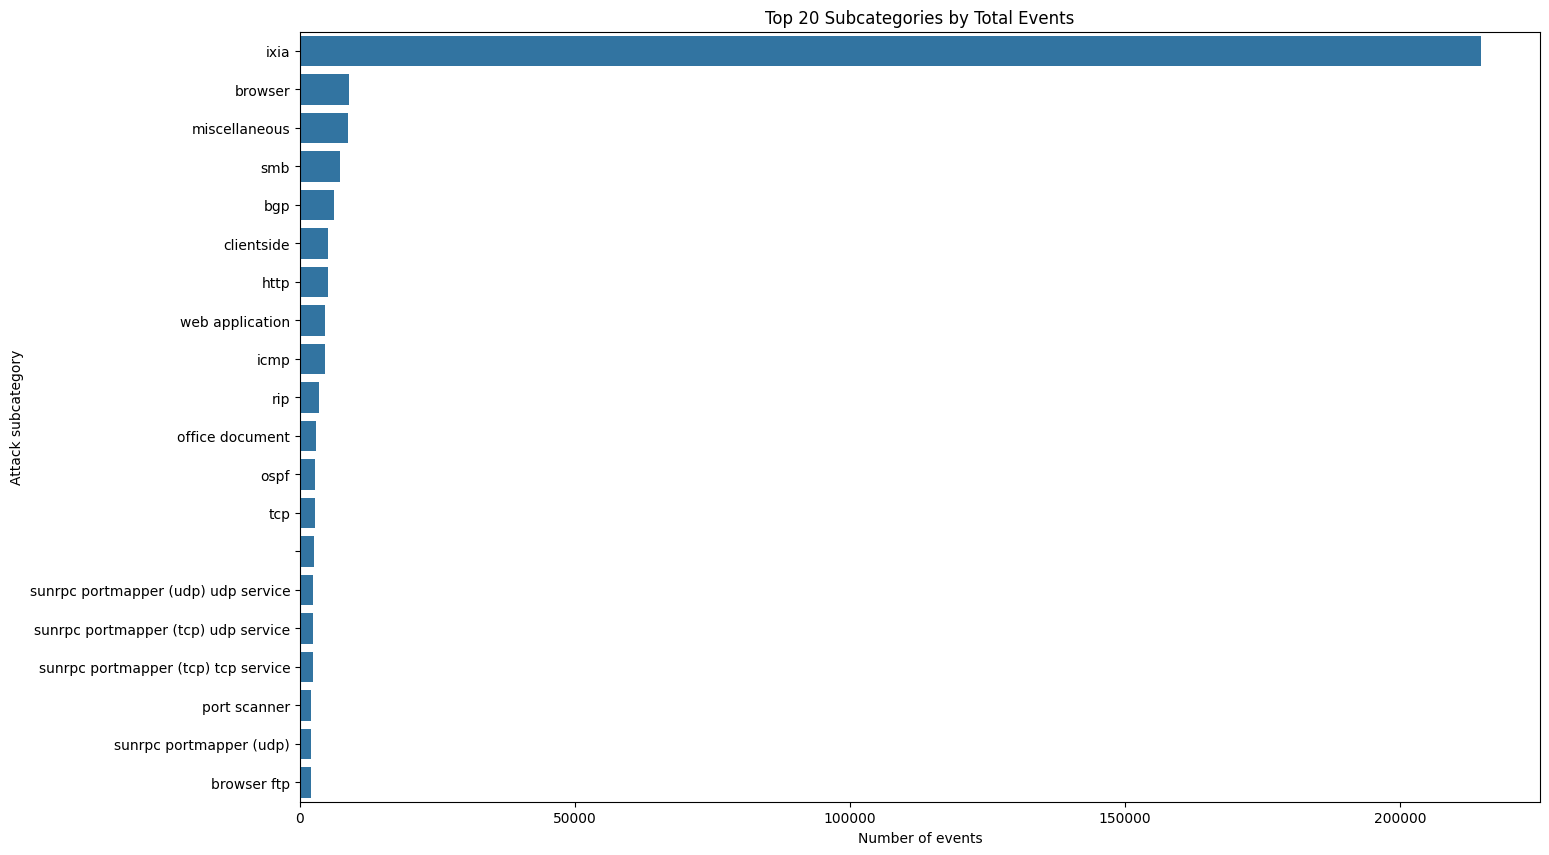

In [10]:
top_n = 20  # Display top 20 categories/subcategories
top_subcategories = attack_subcategory_event_sum.head(top_n)

plt.figure(figsize=(16, 10))
sns.barplot(data=top_subcategories, y='Attack subcategory', x='Number of events', order=top_subcategories['Attack subcategory'])
plt.title(f'Top {top_n} Subcategories by Total Events')
plt.show()


### Visualization: Aggregated Attack Subcategories with "Other"

#### **Description**
- **Purpose**:
  - Simplifies the visualization of attack subcategories by grouping less frequent subcategories into a single category labeled **"Other"**.
  - Focuses on subcategories with a significant number of events, defined by a **threshold**.
- **Threshold**:
  - Subcategories with fewer than `5000` events are grouped into **"Other"** for clarity.

---

#### **Process**
1. **Thresholding**:
   - Subcategories with fewer than `5000` events are replaced with the label **"Other"**.
2. **Re-Aggregation**:
   - The dataset is grouped by the updated **`Attack subcategory`** column to sum the total events, ensuring the **"Other"** category reflects the combined event count of smaller subcategories.



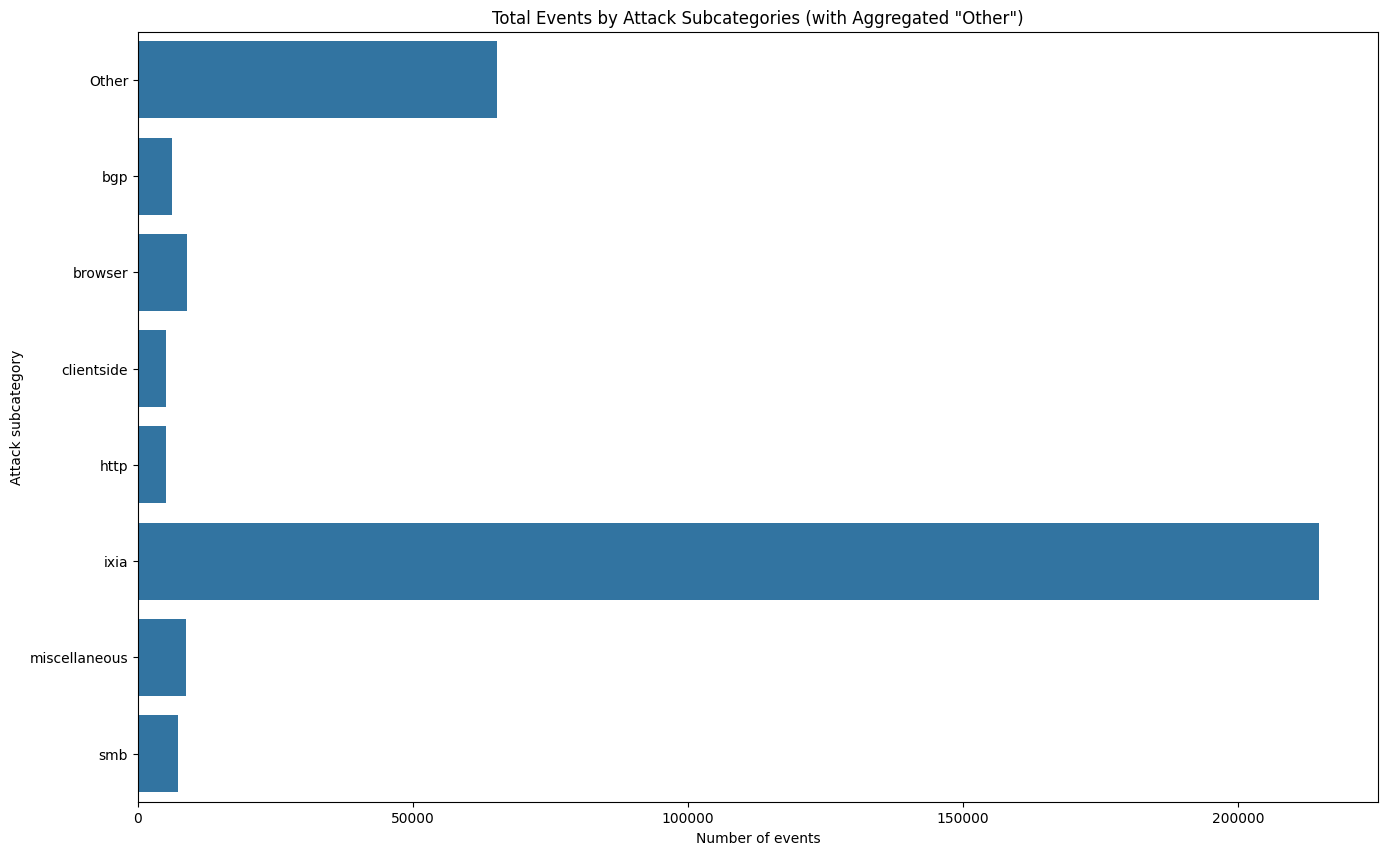

In [11]:
threshold = 5000  # Define a threshold for aggregation
attack_subcategory_event_sum['Attack subcategory'] = attack_subcategory_event_sum['Attack subcategory'].where(
    attack_subcategory_event_sum['Number of events'] >= threshold, 'Other'
)

# Re-aggregate the data after grouping small categories into "Other"
attack_subcategory_event_sum = attack_subcategory_event_sum.groupby('Attack subcategory')['Number of events'].sum().reset_index()

plt.figure(figsize=(16, 10))
sns.barplot(data=attack_subcategory_event_sum, y='Attack subcategory', x='Number of events', order=attack_subcategory_event_sum['Attack subcategory'])
plt.title('Total Events by Attack Subcategories (with Aggregated "Other")')
plt.show()


<ipython-input-12-c3bd0508114d>:13: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(path) for path in [cleaned_one_path, cleaned_two_path, cleaned_three_path, cleaned_four_path]]
<ipython-input-12-c3bd0508114d>:13: DtypeWarning: Columns (3,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(path) for path in [cleaned_one_path, cleaned_two_path, cleaned_three_path, cleaned_four_path]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Columns: 138 entries, 59.166.0.0 to 4
dtypes: float64(107), int64(10), object(21)
memory usage: 2.6+ GB
None
            0.001055           132           164            31            29  \
count  700000.000000  7.000000e+05  7.000000e+05  2.540043e+06  2.540043e+06   
mean        0.863392  5.009643e+03  4.833044e+04  6.278202e+01  3.076681e+01   
std        25.935783  4.489871e+04  1.860517e+05  7.462281e+01  4.285092e+01   
min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%         0.003931  4.240000e+02  3.040000e+02  3.100000e+01  2.900000e+01   
50%         0.027594  2.024000e+03  3.380000e+03  3.100000e+01  2.900000e+01   
75%         0.346519  3.806000e+03  2.243200e+04  3.100000e+01  2.900000e+01   
max      8786.637695  1.367739e+07  1.465542e+07  2.550000e+02  2.540000e+02   

                  0           0.1   500473.9375   621800.9375             2  \
count  2.54

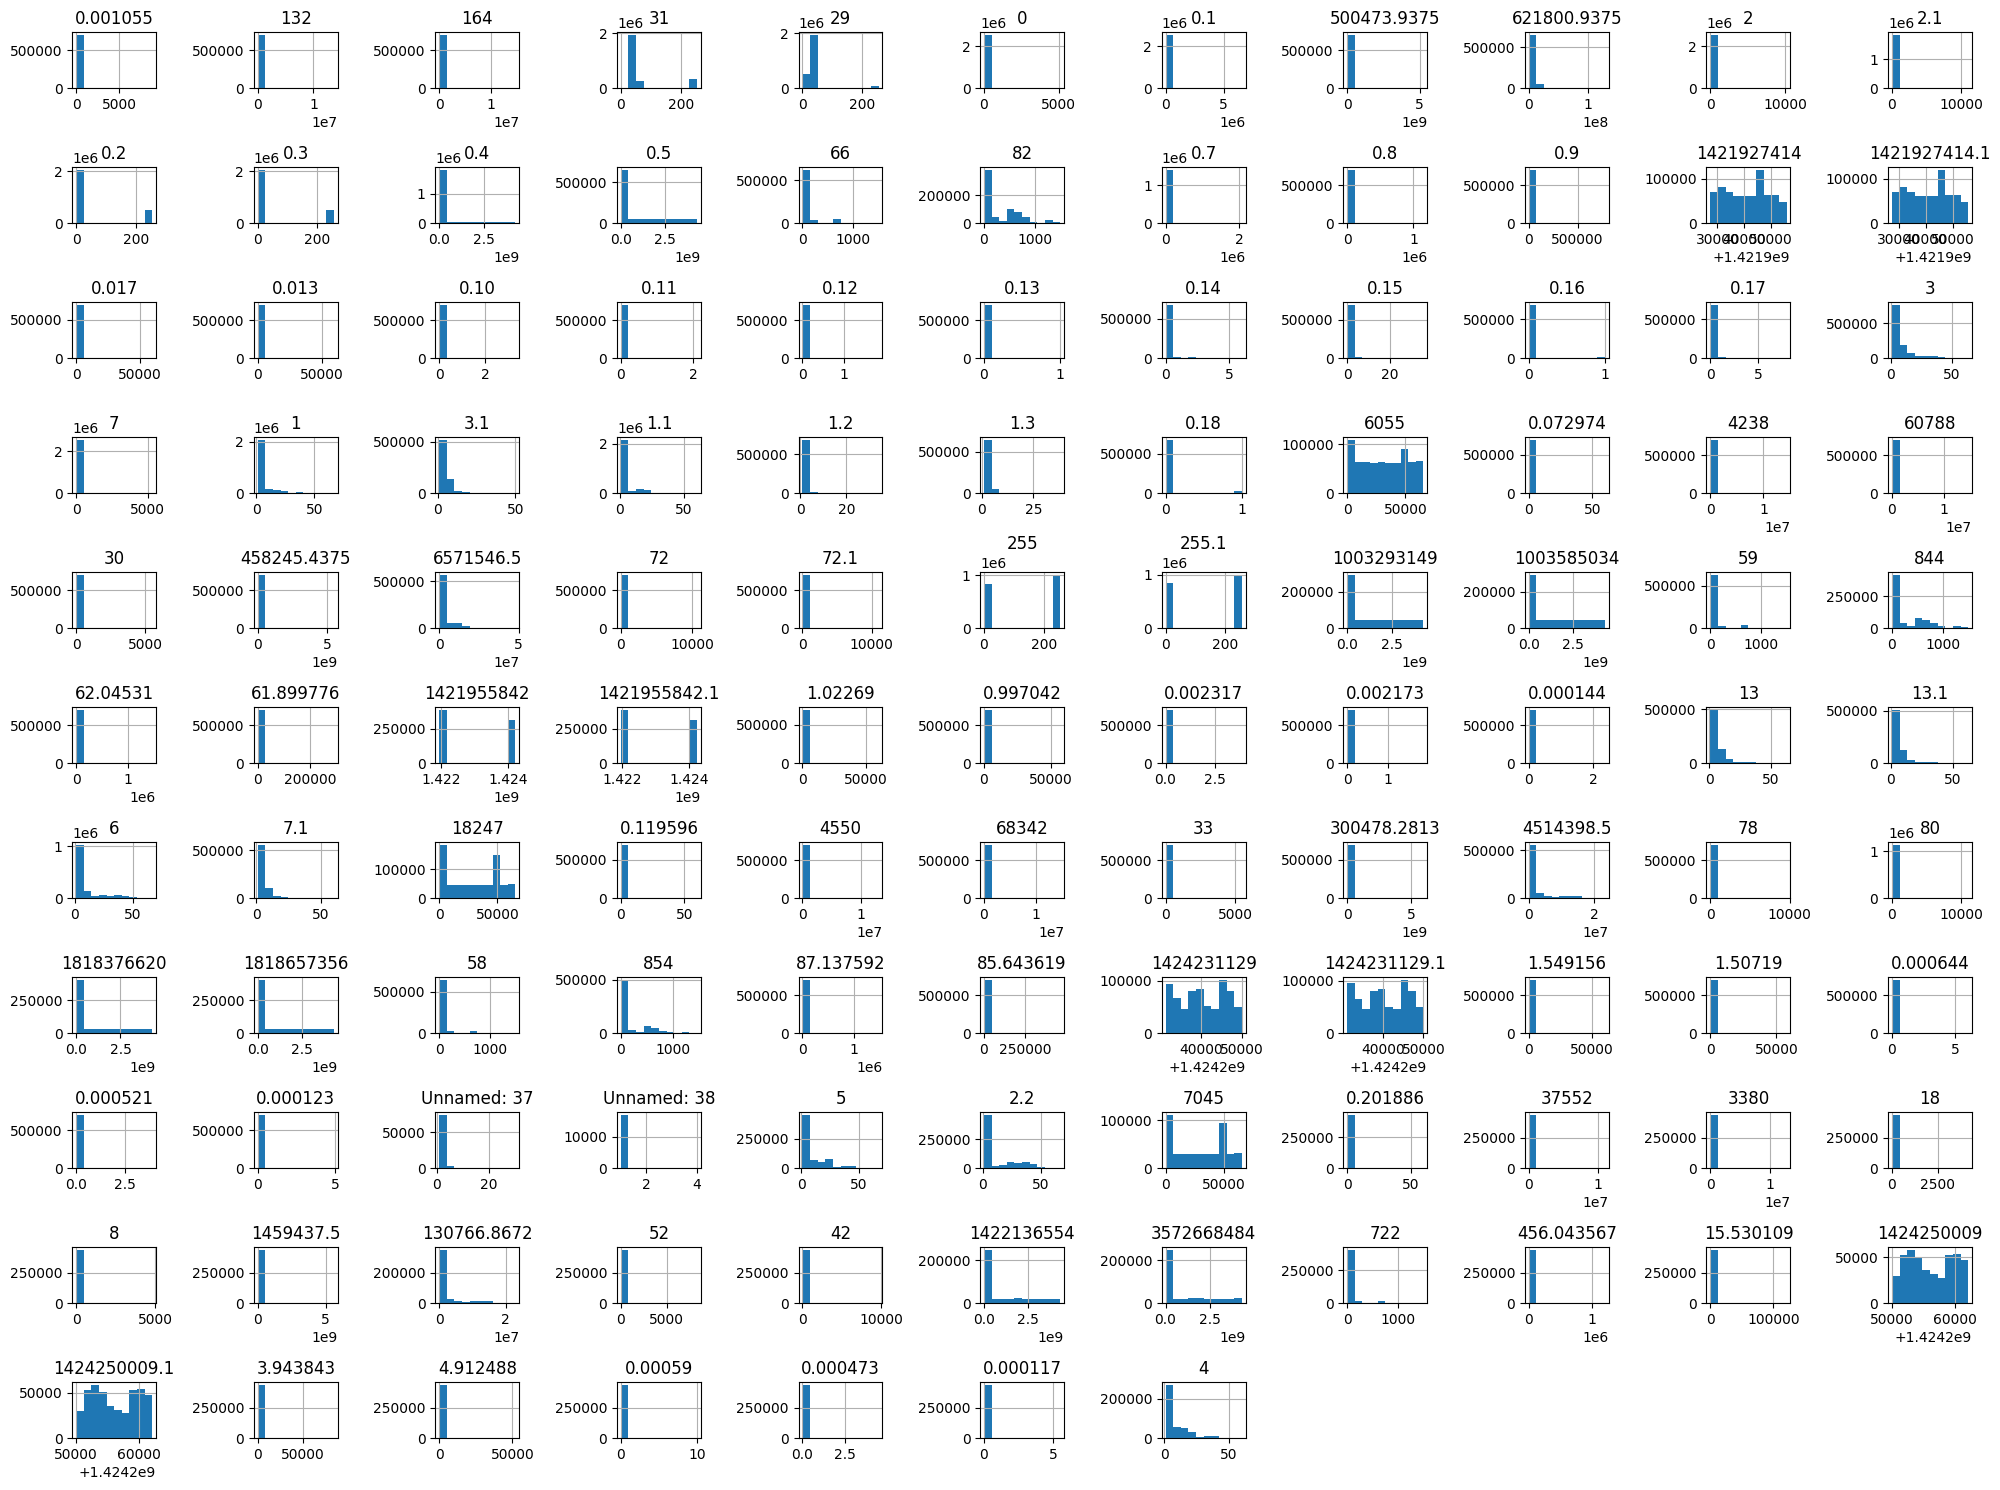

ValueError: could not convert string to float: '59.166.0.0'

<Figure size 1500x1000 with 0 Axes>

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
cleaned_one_path = '/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/UNSW-NB15_1_cleaned.csv'
cleaned_two_path = '/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/UNSW-NB15_2_cleaned.csv'
cleaned_three_path = '/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/UNSW-NB15_3_cleaned.csv'
cleaned_four_path = '/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/cleaned_data/UNSW-NB15_4_cleaned.csv'

# Combine all cleaned data files into one DataFrame
df_list = [pd.read_csv(path) for path in [cleaned_one_path, cleaned_two_path, cleaned_three_path, cleaned_four_path]]
combined_df = pd.concat(df_list, ignore_index=True)

# Overview of the data
print(combined_df.info())
print(combined_df.describe())

# Distribution of numerical features
combined_df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Distribution of categorical features
categorical_columns = combined_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=combined_df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    plt.show()

# Pairplot to visualize feature relationships
sns.pairplot(combined_df.sample(1000))  # Limit to 1000 samples to avoid performance issues
plt.show()
